<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">PROJET 5 - Parcours Data Analyst</h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 1 - Librairies et fonctions</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
.libPaths( c( .libPaths(), "~/R_packages") )
library("readxl")
library("dplyr", warn.conflicts = FALSE) #traitement de données
library("ggplot2") # Graphes matplolib et seaborn

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Déclaration des fonctions</h3>
</div>

In [2]:
#######################################################################
# On écrit une fonction qui permettra de tester si une cle est fiable #
#######################################################################
testerCle <- function(df, colonnes){
    # Fonction qui prend en arguments un dataframe et les colonnes qui composent la clé primaire à tester.
    
    # On compare la taille du dataframe avant et après dédoublonnage 
    if(nrow(df) == nrow(unique(df[colonnes]))){
        print("La clé n'est pas présente plusieurs fois dans le dataframe.")
        print("Elle peut donc être utilisée comme clé primaire.")
    }else {
        print("La clé est présente plusieurs fois dans le dataframe.")
        print("Elle ne peut donc pas être utilisée comme clé primaire.")
    }
    
    # On renvoie également le comptage
    print(sprintf("Le dataframe est de la forme : (%s) (lignes, colonnes)", paste0(dim(df), collapse=",")))
}

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 2 - Importation et préparation des fichiers</h2>
</div>

In [3]:
# On importe le fichier ERP
NomRepertoire <- "F:/35. Projet 05/01. Les données/"
NomFichier <- "erp.xlsx"
df_erp <- read_excel(paste0(NomRepertoire, NomFichier))

# On observe
print(dim(df_erp)) # Affiche le Nombre de Lignes et de Colonnes
print(str(df_erp)) # Affiche le type de données
head(df_erp) #Affiche le dataframe par défaut 5


[1] 825   5
Classes 'tbl_df', 'tbl' and 'data.frame':	825 obs. of  5 variables:
 $ product_id    : num  3847 3849 3850 4032 4039 ...
 $ onsale_web    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ price         : num  24.2 34.3 20.8 14.1 46 34.3 32.7 31.2 60 42.6 ...
 $ stock_quantity: num  0 0 0 0 0 0 15 34 12 66 ...
 $ stock_status  : chr  "outofstock" "outofstock" "outofstock" "outofstock" ...
NULL


product_id,onsale_web,price,stock_quantity,stock_status
3847,1,24.2,0,outofstock
3849,1,34.3,0,outofstock
3850,1,20.8,0,outofstock
4032,1,14.1,0,outofstock
4039,1,46.0,0,outofstock
4040,1,34.3,0,outofstock


In [4]:
# On teste l'unicité de la clé primaire
#testerCle(Erp,1)
testerCle(df_erp, c('product_id')) # C colonne

[1] "La clé n'est pas présente plusieurs fois dans le dataframe."
[1] "Elle peut donc être utilisée comme clé primaire."
[1] "Le dataframe est de la forme : (825,5) (lignes, colonnes)"


In [5]:
# On importe le fichier LIAISON
NomFichier <- "liaison.xlsx"
df_liaison <- read_excel(paste0(NomRepertoire, NomFichier))

# On observe
print(dim(df_liaison))
print(str(df_liaison))
head(df_liaison)

[1] 825   2
Classes 'tbl_df', 'tbl' and 'data.frame':	825 obs. of  2 variables:
 $ product_id: num  3847 3849 3850 4032 4039 ...
 $ id_web    : chr  "15298" "15296" "15300" "19814" ...
NULL


product_id,id_web
3847,15298
3849,15296
3850,15300
4032,19814
4039,19815
4040,15303


In [6]:
# On teste l'unicité de la clé primaire
testerCle(df_liaison, c('product_id')) # C colonne

[1] "La clé n'est pas présente plusieurs fois dans le dataframe."
[1] "Elle peut donc être utilisée comme clé primaire."
[1] "Le dataframe est de la forme : (825,2) (lignes, colonnes)"


In [7]:
# On importe le fichier WEB
NomFichier <- "web.xlsx"
df_web <- read_excel(paste0(NomRepertoire, NomFichier))

# On observe
print(dim(df_web))
print(str(df_web))
head(df_web)

[1] 1513   28
Classes 'tbl_df', 'tbl' and 'data.frame':	1513 obs. of  28 variables:
 $ sku                  : chr  "bon-cadeau-25-euros" "15298" "15296" "15300" ...
 $ virtual              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ downloadable         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ rating_count         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ average_rating       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ total_sales          : num  10 6 0 0 3 0 0 0 7 3 ...
 $ tax_status           : chr  "taxable" "taxable" "taxable" "taxable" ...
 $ tax_class            : logi  NA NA NA NA NA NA ...
 $ post_author          : num  1 2 2 2 2 2 2 2 2 2 ...
 $ post_date            : POSIXct, format: "2018-06-01 13:53:46" "2018-02-08 12:58:52" ...
 $ post_date_gmt        : POSIXct, format: "2018-06-01 11:53:46" "2018-02-08 11:58:52" ...
 $ post_content         : logi  NA NA NA NA NA NA ...
 $ post_title           : chr  "Bon cadeau de 25\200" "Pierre Jean Villa Saint-Joseph Préface 2018" "Pierre Jean Villa Saint-Joseph Rouge T

sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
bon-cadeau-25-euros,0,0,0,0,10,taxable,NA,1,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=4954,0,product,NA,0
15298,0,0,0,0,6,taxable,NA,2,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,0,product,NA,0
15296,0,0,0,0,0,taxable,NA,2,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=3849,0,product,NA,0
15300,0,0,0,0,0,taxable,NA,2,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coeur-2018,2020-06-26 18:15:03,2020-06-26 16:15:03,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=3850,0,product,NA,0
19814,0,0,0,0,3,taxable,NA,2,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=4032,0,product,NA,0
19815,0,0,0,0,0,taxable,NA,2,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=4039,0,product,NA,0


In [8]:
# On teste l'unicité de la clé primaire
testerCle(df_web, c('sku')) # C colonne

[1] "La clé est présente plusieurs fois dans le dataframe."
[1] "Elle ne peut donc pas être utilisée comme clé primaire."
[1] "Le dataframe est de la forme : (1513,28) (lignes, colonnes)"


In [9]:
# On observe les valeurs nulles détectées dans la colonnes sku
recherche_null <- df_web[is.na(df_web$sku),]
# On observe
print(dim(recherche_null))
print(str(recherche_null))
head(recherche_null)

[1] 85 28
Classes 'tbl_df', 'tbl' and 'data.frame':	85 obs. of  28 variables:
 $ sku                  : chr  NA NA NA NA ...
 $ virtual              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ downloadable         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ rating_count         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ average_rating       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ total_sales          : num  NA NA NA NA NA NA NA NA NA NA ...
 $ tax_status           : chr  NA NA NA NA ...
 $ tax_class            : logi  NA NA NA NA NA NA ...
 $ post_author          : num  NA NA NA NA NA NA NA NA NA NA ...
 $ post_date            : POSIXct, format: NA NA ...
 $ post_date_gmt        : POSIXct, format: NA NA ...
 $ post_content         : logi  NA NA NA NA NA NA ...
 $ post_title           : chr  NA NA NA NA ...
 $ post_excerpt         : chr  NA NA NA NA ...
 $ post_status          : chr  NA NA NA NA ...
 $ comment_status       : chr  NA NA NA NA ...
 $ ping_status          : chr  NA NA NA NA ...
 $ post_password   

sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
NA,0,0,0,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,0,0,0,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,0,0,0,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,0,0,0,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,0,0,0,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,0,0,0,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [10]:
# On observe les lignes dont le post_name n'est pas nul
observation <- recherche_null[!is.na(recherche_null$post_name),]

# On observe
print(dim(observation))
head(observation)

[1]  2 28


sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
NA,0,0,0,0,0,taxable,NA,2,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=5070,0,product,NA,0
NA,0,0,0,0,0,taxable,NA,2,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=5075,0,product,NA,0


In [11]:
#Suppression des Nan
df_web <- df_web[!is.na(df_web$sku),]
# On observe
print(dim(df_web))
head(df_web)

[1] 1428   28


sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
bon-cadeau-25-euros,0,0,0,0,10,taxable,NA,1,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=4954,0,product,NA,0
15298,0,0,0,0,6,taxable,NA,2,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,0,product,NA,0
15296,0,0,0,0,0,taxable,NA,2,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=3849,0,product,NA,0
15300,0,0,0,0,0,taxable,NA,2,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coeur-2018,2020-06-26 18:15:03,2020-06-26 16:15:03,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=3850,0,product,NA,0
19814,0,0,0,0,3,taxable,NA,2,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=4032,0,product,NA,0
19815,0,0,0,0,0,taxable,NA,2,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=4039,0,product,NA,0


In [12]:
# On teste l'unicité de la clé primaire
testerCle(df_web, c('sku'))

[1] "La clé est présente plusieurs fois dans le dataframe."
[1] "Elle ne peut donc pas être utilisée comme clé primaire."
[1] "Le dataframe est de la forme : (1428,28) (lignes, colonnes)"


In [13]:
# On ne conserve que les "product"
df_product <- df_web[(df_web$post_type=="product"),]
# On observe
print(dim(df_product))
head(df_product)

[1] 714  28


sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
bon-cadeau-25-euros,0,0,0,0,10,taxable,NA,1,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=4954,0,product,NA,0
15298,0,0,0,0,6,taxable,NA,2,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,0,product,NA,0
15296,0,0,0,0,0,taxable,NA,2,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=3849,0,product,NA,0
15300,0,0,0,0,0,taxable,NA,2,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coeur-2018,2020-06-26 18:15:03,2020-06-26 16:15:03,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=3850,0,product,NA,0
19814,0,0,0,0,3,taxable,NA,2,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=4032,0,product,NA,0
19815,0,0,0,0,0,taxable,NA,2,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=4039,0,product,NA,0


In [14]:
# On teste l'unicité de la clé primaire
testerCle(df_product, c('sku'))

[1] "La clé n'est pas présente plusieurs fois dans le dataframe."
[1] "Elle peut donc être utilisée comme clé primaire."
[1] "Le dataframe est de la forme : (714,28) (lignes, colonnes)"


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 3 - Jointures</h2>
</div>

In [15]:
# On va appliquer une jointure "outer" entre df_erp et df_liaison
df_erp_liaison = merge(x = df_erp, y = df_liaison, by = "product_id", all=TRUE)

# On observe
print(dim(df_erp_liaison))
head(df_erp_liaison)

[1] 825   6


product_id,onsale_web,price,stock_quantity,stock_status,id_web
3847,1,24.2,0,outofstock,15298
3849,1,34.3,0,outofstock,15296
3850,1,20.8,0,outofstock,15300
4032,1,14.1,0,outofstock,19814
4039,1,46.0,0,outofstock,19815
4040,1,34.3,0,outofstock,15303


In [16]:
# On regarde si des product_id de df_erp sont absents de df_liaison
anti_join(df_erp_liaison, df_liaison, by="product_id")

product_id,onsale_web,price,stock_quantity,stock_status,id_web


In [17]:
# On regarde si des product_id de df_liaison sont absents de df_erp
anti_join(df_erp_liaison, df_erp, by="product_id")

product_id,onsale_web,price,stock_quantity,stock_status,id_web


In [18]:
# On effectue une jointure "outer" entre df_erp_liaison et df_product
df_nouvel_erp <- merge(x = df_product, y = df_erp_liaison, by.x = "sku", by.y = "id_web", all=TRUE)

# On observe
print(dim(df_nouvel_erp))
head(df_nouvel_erp)

[1] 825  33


sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status
10014,0,0,0,0,0,taxable,NA,2,2019-04-04 15:45:23,...,https://www.bottle-neck.fr/?post_type=product&#038;p=5913,0,product,NA,0,5913,1,36.0,9,instock
10459,0,0,0,0,0,taxable,NA,2,2018-04-13 15:58:19,...,https://www.bottle-neck.fr/?post_type=product&#038;p=4617,0,product,NA,0,4617,1,67.5,1,instock
10775,0,0,0,0,0,taxable,NA,2,2018-04-17 21:28:52,...,https://www.bottle-neck.fr/?post_type=product&#038;p=4709,0,product,NA,0,4709,1,44.0,0,outofstock
10814,0,0,0,0,0,taxable,NA,2,2018-04-17 10:12:40,...,https://www.bottle-neck.fr/?post_type=product&#038;p=4656,0,product,NA,0,4656,1,43.0,3,instock
11049,0,0,0,0,0,taxable,NA,2,2018-04-13 16:07:49,...,https://www.bottle-neck.fr/?post_type=product&#038;p=4619,0,product,NA,0,4619,1,59.0,5,instock
11225,0,0,0,0,0,taxable,NA,2,2018-06-06 16:47:38,...,https://www.bottle-neck.fr/?post_type=product&#038;p=4970,0,product,NA,0,4970,1,49.5,0,outofstock


In [19]:
# On regarde si des lignes de df_product n'ont pas matchées
df_verif <- anti_join(df_product, df_nouvel_erp, by= "sku")

# On observe
print(dim(df_verif))
head(df_verif)

[1]  0 28


Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


In [20]:
# On regarde si des lignes de df_erp_liaison n'ont pas matchées
df_verif2 <- anti_join(df_erp_liaison, df_product, by=c("id_web"="sku"))

# On observe
print(dim(df_verif2))
head(df_verif2)

[1] 111   6


product_id,onsale_web,price,stock_quantity,stock_status,id_web
4055,0,86.1,0,outofstock,NA
4090,0,73.0,0,outofstock,NA
4092,0,47.0,0,outofstock,NA
4195,0,14.1,0,outofstock,NA
4209,0,73.5,0,outofstock,NA
4233,0,20.0,0,outofstock,NA


In [21]:
# On observe les lignes dont l'id_web n'est pas nul
df_verif3 <- df_verif2[!is.na(df_verif2$id_web),]

# On observe
print(dim(df_verif3))
head(df_verif3)

[1] 20  6


,product_id,onsale_web,price,stock_quantity,stock_status,id_web
9,4289,0,22.8,0,outofstock,13771
11,4568,0,21.5,0,outofstock,15065
14,4584,0,32.3,0,outofstock,14785
25,4741,0,12.4,0,outofstock,12601
28,4864,0,8.3,0,outofstock,15154
29,4869,0,17.2,0,outofstock,14360


In [22]:
# On ne conserve que les lignes qui ont trouvé une correspondance
df_donnees <- df_nouvel_erp[ ! (df_nouvel_erp$product_id  %in% c(df_verif2$product_id, df_verif3$product_id)), ]

# On observe
print(dim(df_donnees))
head(df_donnees)

[1] 714  33


sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status
10014,0,0,0,0,0,taxable,NA,2,2019-04-04 15:45:23,...,https://www.bottle-neck.fr/?post_type=product&#038;p=5913,0,product,NA,0,5913,1,36.0,9,instock
10459,0,0,0,0,0,taxable,NA,2,2018-04-13 15:58:19,...,https://www.bottle-neck.fr/?post_type=product&#038;p=4617,0,product,NA,0,4617,1,67.5,1,instock
10775,0,0,0,0,0,taxable,NA,2,2018-04-17 21:28:52,...,https://www.bottle-neck.fr/?post_type=product&#038;p=4709,0,product,NA,0,4709,1,44.0,0,outofstock
10814,0,0,0,0,0,taxable,NA,2,2018-04-17 10:12:40,...,https://www.bottle-neck.fr/?post_type=product&#038;p=4656,0,product,NA,0,4656,1,43.0,3,instock
11049,0,0,0,0,0,taxable,NA,2,2018-04-13 16:07:49,...,https://www.bottle-neck.fr/?post_type=product&#038;p=4619,0,product,NA,0,4619,1,59.0,5,instock
11225,0,0,0,0,0,taxable,NA,2,2018-06-06 16:47:38,...,https://www.bottle-neck.fr/?post_type=product&#038;p=4970,0,product,NA,0,4970,1,49.5,0,outofstock


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 4 - CA par produit et total</h2>
</div>

In [23]:
# On créé une colonne calculée
df_donnees$CA = df_donnees$price * df_donnees$total_sales

# On observe
print(dim(df_donnees[,c("price","total_sales","CA")]))
head(df_donnees[,c("price","total_sales","CA")])

[1] 714   3


price,total_sales,CA
36.0,0,0
67.5,0,0
44.0,0,0
43.0,0,0
59.0,0,0
49.5,0,0


In [24]:
# On calcule la somme de la colonne CA_per_product
CA_total <- sum(df_donnees$CA)

# On affiche le résultat
print(paste("Le chiffre d'affaire total réalisé est de", CA_total, "euros."))

[1] "Le chiffre d'affaire total réalisé est de 70568.6 euros."


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 5 - Analyse univariée</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.1 - Méthode du z score (supérieur à 2 standard deviation)<br/>
<br/>
Z score = (Observation - Mean)/standard deviation</h3>
</div>

In [25]:
# On récupère la colonne price
df_prix <- df_donnees$price
# On écrit une fonction qui va lister les prix considérés comme outliers
df_prix <- round((df_prix-mean(df_prix))/sd(df_prix),3)
df_donnees$zscore = df_prix 
outlier <- df_donnees$price [df_donnees$zscore >= 2]

# On observe
cat("Le nombre d'outliers détectés est de", length(outlier))
head(outlier, length(outlier))


Le nombre d'outliers détectés est de 30

[1]  99.0 105.0  88.4 126.5 115.0 105.0 109.6 112.0 115.0 137.0 217.5 105.6
[13] 114.0  93.0 122.0 102.3 124.8 135.0 191.3 121.0 121.0 116.4 175.0 100.0
[25] 225.0  92.0 108.5 104.0 176.0 157.0

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.2 - Méthode des interquartiles<br/>
<br/>
1,5 fois la distance interquartile avant le premier et après le troisième</h3>
</div>

In [26]:
# On ordonne les prix
df_prix <- df_donnees$price


In [27]:
# On calcule l'interquartile
Q1 <- round(quantile(df_prix, probs = c(0.25)),2)
Q3 <- round(quantile(df_prix, probs = c(0.75)),2)
IQR <- round(IQR(df_prix),2)
# On calcule les valeurs limite
Upper_bound <- round(Q3 + 1.5*IQR,2)
Lower_bound <- round(Q1 - 1.5*IQR, 2)
# On cherche les outliers
outlier <- df_donnees$price [df_donnees$price >= Upper_bound]
# On observe
cat(" 1er Quartile :", Q1, "\n" , "3ème Quartile :", Q3, "\n" , "Interquartille :", IQR, "\n", "Moustache Supérieure :", Upper_bound, "\n", "Moustache Inférieure :", Lower_bound, "\n")
cat("\n")
cat("Le nombre d'outliers détectés est de", length(outlier))
head(outlier, length(outlier))

 1er Quartile : 14.1 
 3ème Quartile : 42.18 
 Interquartille : 28.08 
 Moustache Supérieure : 84.3 
 Moustache Inférieure : -28.02 

Le nombre d'outliers détectés est de 32

[1]  99.0 105.0  88.4 126.5 115.0 105.0 109.6  85.6  86.8 112.0 115.0 137.0
[13] 217.5 105.6 114.0  93.0 122.0 102.3 124.8 135.0 191.3 121.0 121.0 116.4
[25] 175.0 100.0 225.0  92.0 108.5 104.0 176.0 157.0

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.3 - Méthode graphique avec un scatter plot</h3>
</div>

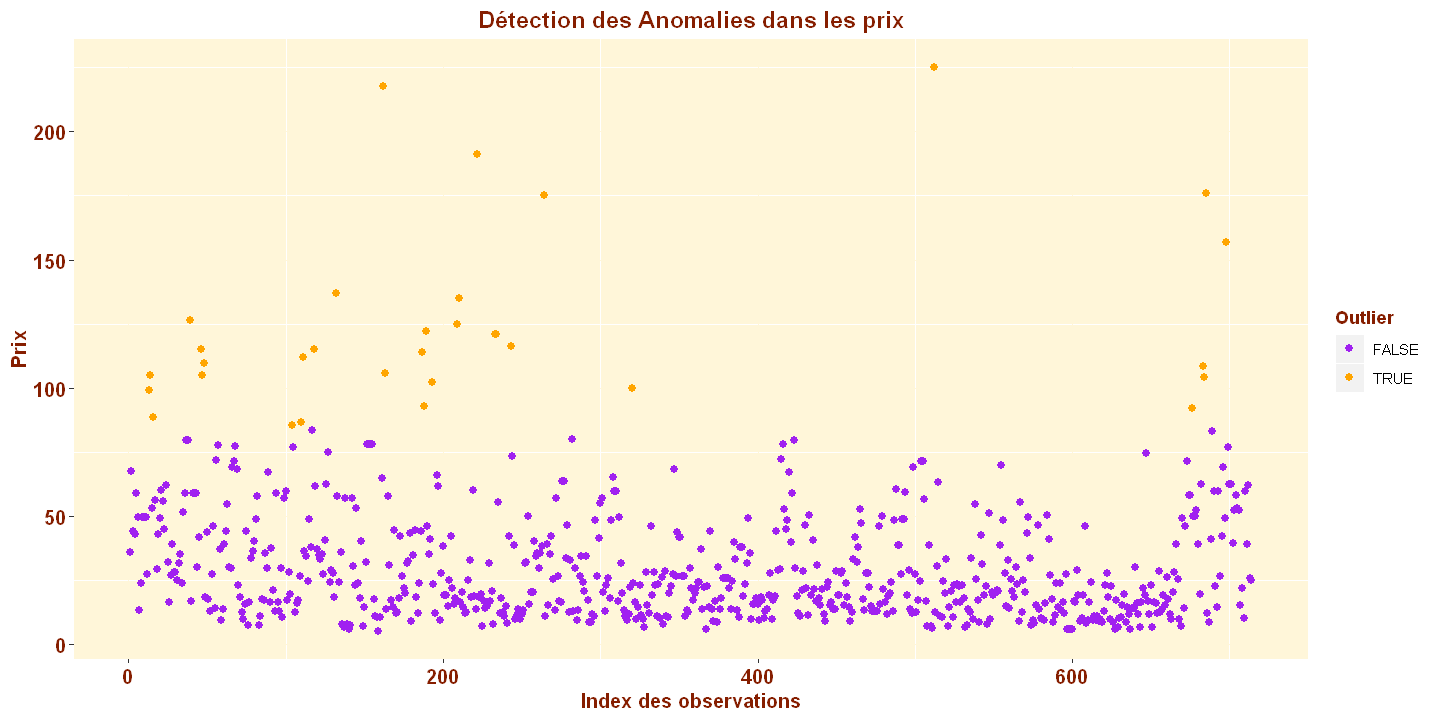

In [38]:
# On se créé un vecteur booléen déterminant si un prix est un outlier ou pas
df_donnees$outlier <- ifelse (df_donnees$price >= Upper_bound , TRUE, FALSE)

# Définis la taille du graphique (en pouces)
options(repr.plot.width = 12, repr.plot.height = 6)

# Définis la couleur de fond et la taille des points
ggplot(df_donnees, aes(x = 1:nrow(df_donnees), y = price, color = outlier)) +
  geom_point(size = 2) +  # Taille des points (ajuste selon tes besoins)
  scale_color_manual(values = c("FALSE" = "purple", "TRUE" = "orange")) +  # Couleurs pour les outliers
  theme(
    panel.background = element_rect(fill = "#fff6d9"),  # Fond du graphique
    panel.grid.major = element_line(color = "#fff6d9"),   # Grille légère
    plot.title = element_text(color = "#861e00", size = 14, face = "bold", hjust = 0.5),  # Titre principal
    axis.title = element_text(color = "#861e00", size = 12, face = "bold"),  # Taille des titres
    axis.text = element_text(color = "#861e00", size = 12, face = "bold"),   # Taille des axes
    legend.title = element_text(color = "#861e00", face = "bold")    
  ) +
  labs(
    title = "Détection des Anomalies dans les prix",
    x = "Index des observations",
    y = "Prix",
    color = "Outlier"  # Légende
  )

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.4 - Méthode graphique avec boxplot (2 exemples)</h3>
</div>

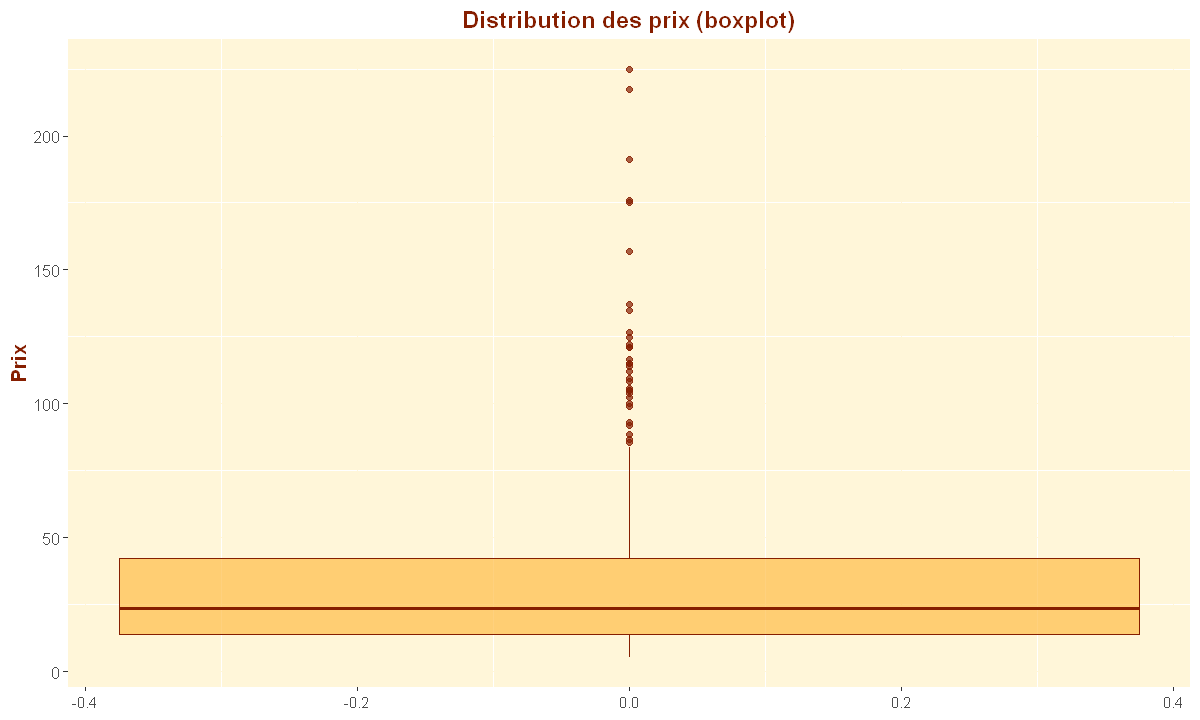

In [53]:
# Définis la taille du graphique dans Jupyter
options(repr.plot.width = 10, repr.plot.height = 6)

# Crée le boxplot avec les mêmes styles
ggplot(df_donnees, aes(y = price)) +
  geom_boxplot(
    fill = "#ffbd47",  # Couleur des boîtes (bleu clair, comme dans ton premier graphique)
    color = "#861e00",   # Bordure noire pour les boîtes
    alpha = 0.7       # Légère transparence
  ) +
  theme(
    panel.background = element_rect(fill = "#fff6d9"),  # Fond du graphique
    panel.grid.major = element_line(color = "#fff6d9"),   # Grille légère
    plot.title = element_text(
      color = "#861e00",
      size = 14,
      face = "bold",
      hjust = 0.5  # Titre centré
    ),
    axis.title.y = element_text(
      color = "#861e00",
      size = 12,
      face = "bold"
    ),
    axis.text.y = element_text(size = 10)  # Taille du texte de l'axe Y
  ) +
  labs(
    title = "Distribution des prix (boxplot)",
    y = "Prix"  # Titre de l'axe Y
  )

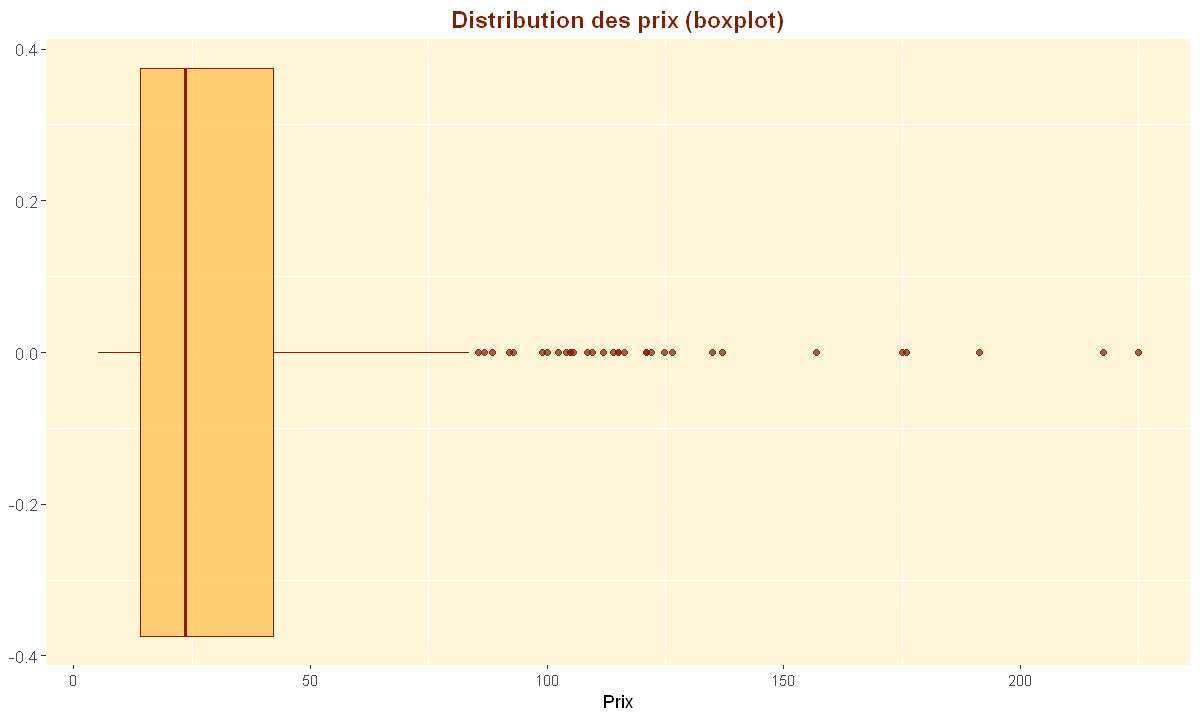

In [54]:
# Définis la taille du graphique dans Jupyter
options(repr.plot.width = 10, repr.plot.height = 6)

# Crée le boxplot avec les mêmes styles
ggplot(df_donnees, aes(y = price)) +
  geom_boxplot(
    fill = "#ffbd47",  # Couleur des boîtes (bleu clair, comme dans ton premier graphique)
    color = "#861e00",   # Bordure noire pour les boîtes
    alpha = 0.7       # Légère transparence
  ) +
coord_flip() +
  theme(
    panel.background = element_rect(fill = "#fff6d9"),  # Fond du graphique
    panel.grid.major = element_line(color = "#fff6d9"),   # Grille légère
    plot.title = element_text(
      color = "#861e00",
      size = 14,
      face = "bold",
      hjust = 0.5  # Titre centré
    ),
    axis.title.y = element_text(
      color = "#861e00",
      size = 12,
      face = "bold"
    ),
    axis.text.y = element_text(size = 10)  # Taille du texte de l'axe Y
  ) +
  labs(
    title = "Distribution des prix (boxplot)",
    y = "Prix"  # Titre de l'axe Y
  )